# Application Programming Interface

Objectives
Create and Use APIs in Python

In [3]:
!pip install nba_api

     |████████████████████████████████| 242 kB 11.1 MB/s eta 0:00:01


# Pandas is an API

In [4]:
def one_dict(list_dict):
    keys = list_dict[0].keys()
    out_dict = {key:[] for key in keys}
    for dict_ in list_dict:
        for key, value in dict_.items():
            out_dict[key].append(value)
    return out_dict            

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
# create dictionary as just data
dict_ = {'a':[11, 21,31], 'b':[12,22,32]}

In [7]:
# create a Pandas object with Dataframe constructor
# in API lingo its an 'instance'
df = pd.DataFrame(dict_)
type(df)

pandas.core.frame.DataFrame

In [8]:
df.head()

,a,b
0,11,12
1,21,22
2,31,32


In [9]:
df.mean()

a    21.0
b    22.0
dtype: float64

# REST API
NBA API is used to determine how well the Golden State Warriors performed against the Toronto Raptor

In [10]:
from nba_api.stats.static import teams
import matplotlib.pyplot as plt

In [10]:
#https://pypi.org/project/nba-api/

In [11]:
nba_teams = teams.get_teams()

In [12]:
nba_teams[0:3]

[{'id': 1610612737,
  'full_name': 'Atlanta Hawks',
  'abbreviation': 'ATL',
  'nickname': 'Hawks',
  'city': 'Atlanta',
  'state': 'Atlanta',
  'year_founded': 1949},
 {'id': 1610612738,
  'full_name': 'Boston Celtics',
  'abbreviation': 'BOS',
  'nickname': 'Celtics',
  'city': 'Boston',
  'state': 'Massachusetts',
  'year_founded': 1946},
 {'id': 1610612739,
  'full_name': 'Cleveland Cavaliers',
  'abbreviation': 'CLE',
  'nickname': 'Cavaliers',
  'city': 'Cleveland',
  'state': 'Ohio',
  'year_founded': 1970}]

In [12]:
# convert the dictionary to a table
# first create a dictionary
dict_nba_team=one_dict(nba_teams)
df_teams=pd.DataFrame(dict_nba_team)
df_teams.head()

,id,full_name,abbreviation,nickname,city,state,year_founded
0,1610612737,Atlanta Hawks,ATL,Hawks,Atlanta,Atlanta,1949
1,1610612738,Boston Celtics,BOS,Celtics,Boston,Massachusetts,1946
2,1610612739,Cleveland Cavaliers,CLE,Cavaliers,Cleveland,Ohio,1970
3,1610612740,New Orleans Pelicans,NOP,Pelicans,New Orleans,Louisiana,2002
4,1610612741,Chicago Bulls,CHI,Bulls,Chicago,Illinois,1966


In [16]:
# Will use the team's nickname to find the unique id
df_warriors = df_teams[df_teams['nickname'] == 'Warriors']
df_warriors


,id,full_name,abbreviation,nickname,city,state,year_founded
7,1610612744,Golden State Warriors,GSW,Warriors,Golden State,California,1946


In [17]:
id_warriors=df_warriors[['id']].values[0][0]
#we now have an integer that can be used   to request the Warriors information 
id_warriors

1610612744

The function "League Game Finder " will make an API call, its in the module stats.endpoints

In [18]:
from nba_api.stats.endpoints import leaguegamefinder

The parameter team_id_nullable is the unique ID for the warriors. Under the hood, the NBA API is making a HTTP request.
The information requested is provided and is transmitted via an HTTP response this is assigned to the object gamefinder.

In [20]:
# Since https://stats.nba.com does not allow api calls from Cloud IPs and Skills Network Labs uses a Cloud IP.
# The following code is comment out, you can run it on jupyter labs on your own computer.
# gamefinder = leaguegamefinder.LeagueGameFinder(team_id_nullable=id_warriors)

ReadTimeout: HTTPSConnectionPool(host='stats.nba.com', port=443): Read timed out. (read timeout=30)

In [ ]:
# Since https://stats.nba.com does not allow api calls from Cloud IPs and Skills Network Labs uses a Cloud IP.
# The following code is comment out, you can run it on jupyter labs on your own computer.
# games = gamefinder.get_data_frames()[0]
# games.head()

Download the dataframe from the API call for Golden State and run the rest like a video.

In [21]:
! wget https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/PY0101EN/Chapter%205/Labs/Golden_State.pkl

--2021-01-19 10:43:43--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/PY0101EN/Chapter%205/Labs/Golden_State.pkl
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 811065 (792K) [application/octet-stream]
Saving to: ‘Golden_State.pkl’

Golden_State.pkl    100%[===================>] 792.06K  1.71MB/s    in 0.5s    

2021-01-19 10:43:44 (1.71 MB/s) - ‘Golden_State.pkl’ saved [811065/811065]



In [22]:
file_name = "Golden_State.pkl"
games = pd.read_pickle(file_name)
games.head()

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS
0,22019,1610612744,GSW,Golden State Warriors,1521900066,2019-07-12,GSW vs. LAL,L,200,87,...,0.800,13.0,29.0,42.0,13,10.0,3,11.0,21,3.2
1,22019,1610612744,GSW,Golden State Warriors,1521900058,2019-07-10,GSW @ DEN,W,201,73,...,0.867,7.0,27.0,34.0,10,11.0,7,20.0,20,-8.0
2,22019,1610612744,GSW,Golden State Warriors,1521900039,2019-07-08,GSW @ LAL,W,200,88,...,0.621,8.0,29.0,37.0,21,10.0,4,13.0,22,8.0
3,22019,1610612744,GSW,Golden State Warriors,1521900020,2019-07-07,GSW vs. TOR,W,201,80,...,0.923,6.0,37.0,43.0,18,8.0,3,20.0,25,10.0
4,22019,1610612744,GSW,Golden State Warriors,1521900007,2019-07-05,GSW vs. CHA,L,200,85,...,0.889,8.0,28.0,36.0,19,9.0,3,13.0,15,-8.0


create two dataframes, one for the games that the Warriors faced the raptors at home and the second for away games

In [23]:
games_home = games[games['MATCHUP'] == 'GSW vs. TOR']
games_away = games[games ['MATCHUP'] == 'GSW @ TOR']

calculate the mean for the column PLUS_MINUS for the dataframes games_home and  games_away

In [26]:
games_home.mean()['PLUS_MINUS']


3.730769230769231

In [25]:
games_away.mean()['PLUS_MINUS']

-0.6071428571428571

plot out the PLUS MINUS column for for the dataframes games_home and  games_away. We see the warriors played better at home.

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:5: UserWarning: Legend does not support 'a' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:5: UserWarning: Legend does not support 'w' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:5: UserWarning: Legend does not support 'y' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists


NameError: name 'plot' is not defined

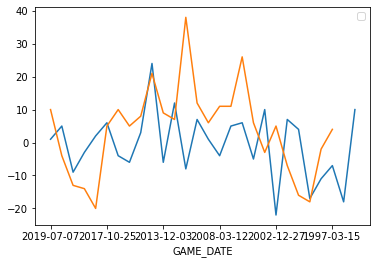

In [30]:
fig, ax = plt.subplots()

games_away.plot(x = 'GAME_DATE', y = 'PLUS_MINUS', ax = ax)
games_home.plot(x = 'GAME_DATE', y = 'PLUS_MINUS', ax = ax)
ax.legend('away','home')
plot.show()

# Quiz

Calculate the mean for the column PTS for the dataframes games_home and  games_away:

In [31]:
games_home.mean()['PTS']

106.8076923076923

In [34]:
games_away.mean()['PTS']

102.96428571428571

# Watson Speech to Text Translator

In [35]:
#you will need the following library 
!pip install PyJWT==1.7.1 ibm_watson wget

     |████████████████████████████████| 382 kB 12.8 MB/s eta 0:00:01
     |████████████████████████████████| 198 kB 40.3 MB/s eta 0:00:01
  Created wheel for ibm-watson: filename=ibm_watson-5.1.0-py3-none-any.whl size=375438 sha256=5197aa1f8039acf9421928b9180692ad9e74e96fb5dab66f7f8dbb4b5e5ed021
  Stored in directory: /tmp/wsuser/.cache/pip/wheels/c1/40/da/ba44de639af32759a5755cb79afedf309104b13fea09bbb5fc
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9681 sha256=b294b62f2d5fba31cb7c09a6ffb920b745b24ca83c2fc3dc121ff2542e109b13
  Stored in directory: /tmp/wsuser/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
  Created wheel for ibm-cloud-sdk-core: filename=ibm_cloud_sdk_core-3.3.6-py3-none-any.whl size=55784 sha256=60ca0c62802c14d1e8c00dae7d366e9a83b8a8f9619b809d482f57896f3af2be
  Stored in directory: /tmp/wsuser/.cache/pip/wheels/16/b7/81/09fb2180cf0fc78365d60257dccde786efe2ee4e67446e4dd2
Successfully built ibm-watson wget ibm-cloud-sd

First we import SpeechToTextV1 from ibm_watson

In [36]:
from ibm_watson import SpeechToTextV1
import json
from ibm_cloud_sdk_core.authenticators import IAMAuthenticator

In [37]:
url_s2t = ''

In [38]:
iam_apikey_s2t = ''

In [39]:
authenticator = IAMAuthenticator(iam_apikey_s2t)
s2t = SpeechToTextV1(authenticator = authenticator)
s2t.set_service_url(url_s2t)
s2t

In [40]:
!wget -O PolynomialRegressionandPipelines.mp3  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/PY0101EN/labs/PolynomialRegressionandPipelines.mp3


--2021-01-19 11:36:23--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/PY0101EN/labs/PolynomialRegressionandPipelines.mp3
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4234179 (4.0M) [audio/mpeg]
Saving to: ‘PolynomialRegressionandPipelines.mp3’

PolynomialRegressio 100%[===================>]   4.04M  1.26MB/s    in 3.2s    

2021-01-19 11:36:27 (1.26 MB/s) - ‘PolynomialRegressionandPipelines.mp3’ saved [4234179/4234179]



In [42]:
filename = 'PolynomialRegressionandPipelines.mp3'

In [43]:
with open(filename, mode="rb")  as wav:
    response = s2t.recognize(audio=wav, content_type='audio/mp3')

In [45]:
response.result

{'result_index': 0,
 'results': [{'final': True,
   'alternatives': [{'transcript': 'in this video we will cover polynomial regression and pipelines ',
     'confidence': 0.94}]},
  {'final': True,
   'alternatives': [{'transcript': "what do we do when a linear model is not the best fit for our data let's look into another type of regression model the polynomial regression we transform our data into a polynomial then use linear regression to fit the parameters that we will discuss pipelines pipelines are way to simplify your code ",
     'confidence': 0.9}]},
  {'final': True,
   'alternatives': [{'transcript': "polynomial regression is a special case of the general linear regression this method is beneficial for describing curvilinear relationships what is a curvilinear relationship it's what you get by squaring or setting higher order terms of the predictor variables in the model transforming the data the model can be quadratic which means the predictor variable in the model is squar

In [46]:
from pandas.io.json import json_normalize

json_normalize(response.result['results'],"alternatives")

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  app.launch_new_instance()


,transcript,confidence
0,in this video we will cover polynomial regress...,0.94
1,what do we do when a linear model is not the b...,0.90
2,polynomial regression is a special case of the...,0.95
3,the model can be cubic which means the predict...,0.95
4,there also exists higher order polynomial regr...,0.91
5,let's look at an example from our data we gene...,0.89
6,in python we do this by using the poly fit fun...,0.92
7,negative one point five five seven X. one cute...,0.90
8,consider the feature shown here applying the m...,0.90
9,pipeline sequentially perform a series of tran...,0.89


In [47]:
response

obtain the recognized text and assign it to the variable recognized_text:

In [48]:
recognized_text=response.result['results'][0]["alternatives"][0]["transcript"]
type(recognized_text)

str

# Language Translator


In [49]:
from ibm_watson import LanguageTranslatorV3

In [50]:
url_lt = ''

In [51]:
apikey_lt = ''

In [52]:
version_lt = '2021-01-18'

In [53]:
# create a language translator object
authenticator = IAMAuthenticator(apikey_lt)
language_translator = LanguageTranslatorV3(version=version_lt,authenticator=authenticator)
language_translator.set_service_url(url_lt)
language_translator

In [54]:
from pandas.io.json import json_normalize

json_normalize(language_translator.list_identifiable_languages().get_result(), "languages")

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  app.launch_new_instance()


,language,name
0,af,Afrikaans
1,ar,Arabic
2,az,Azerbaijani
3,ba,Bashkir
4,be,Belarusian
...,...,...
71,uk,Ukrainian
72,ur,Urdu
73,vi,Vietnamese
74,zh,Simplified Chinese


In [55]:
translation_response = language_translator.translate(text = recognized_text, model_id = 'en-es')
translation_response

In [56]:
translation=translation_response.get_result()
translation

{'translations': [{'translation': 'en este vídeo cubriremos la regresión polinómica y las tuberías '}],
 'word_count': 10,
 'character_count': 64}

In [59]:
# obtain the actual translation as a string
spanish_translation =translation['translations'][0]['translation']
spanish_translation

'en este vídeo cubriremos la regresión polinómica y las tuberías '

In [60]:
# translate back to English
translation_new = language_translator.translate(text=spanish_translation ,model_id='es-en').get_result()

In [61]:
translation_eng=translation_new['translations'][0]['translation']
translation_eng

'in this video we will cover the polynomial regression and the pipes '

In [62]:
# Quiz 
# Translate to French
translate_fr = language_translator.translate(text = translation_eng, model_id = 'en-fr').get_result()

In [64]:
translate_fr['translations'][0]['translation']

'Dans cette vidéo nous couvrons la régression polynomiale et les tuyaux '